# Doctor's Consultation Fees Prediction

# Problem Statement:

Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# Importing Important Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [147]:
df_train=pd.read_excel('C:/Users/vishu/OneDrive/Desktop/Final_Train.xlsx')
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


# Test data

In [148]:
#Loading the test data
df_test = pd.read_excel('C:/Users/vishu/OneDrive/Desktop/Final_Test.xlsx')
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


# DATASET DESCRIPTION

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

# Train data

In [149]:
df_train.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [150]:
#Checking for shape (ie.,number of rows and columns.)
print(df_train.shape)

(5961, 7)


train data has 5961 rows and 7 columns

In [151]:
#Checking the columns of train dataset
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [152]:
#Checking for object type:
for column in df_train.columns:
    if df_train[column].dtype==object:
        print(str(column)+ ':' + str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print('==========================================================')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                                                                                       488
BHMS                                                                                                                                                      477
BAMS                                                                                                                                                      471
MBBS                                                                                                                                                      334
MBBS, MS - E

In [153]:
# checking the datatypes of train dataset.
print(df_train.dtypes)

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object


==> All the values are of Object type except 'Fees' column.Fee column is of int type.

In [154]:
#Checking the information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [155]:
#Checking the null values
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

==> There are missing values in the Rating,Place and Miscellaneous_Info columns.All the missing columns are of object type.

==> So,we impute the missing values with mode.

# Removing null values

# Rating column

In [156]:
for col in ['Rating']:
    df_train[col].fillna(df_train[col].mode()[0],inplace = True)

In [157]:

df_train['Rating'] = df_train['Rating'].str[0:-1].astype(float)

# Place column

In [158]:
# Replacing Null values with 'Unknown' 
df_train['Place'].fillna('Unknown,Unknown', inplace=True)

df_train['locality'] = df_train['Place'].str.split(",").str[0]
df_train['city'] = df_train['Place'].str.split(",").str[1]

# Now we can drop the Place Column
df_train.drop('Place',axis=1,inplace=True)

In [159]:
#Drop the Useless features
df_train.drop(['Miscellaneous_Info'], axis=1, inplace=True)

In [160]:
df_train.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
locality         0
city             1
dtype: int64

In [161]:
df_train['city'].fillna('Unknown', inplace=True)

In [162]:
df_train.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
locality         0
city             0
dtype: int64

# Experience column

In [163]:
# converting Experience column into Numeric
df_train['Experience'] = df_train['Experience'].str.split().str[0]
df_train['Experience'] = df_train['Experience'].astype(int)

In [164]:
df_train.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100.0,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100.0,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100.0,Ayurveda,250,Keelkattalai,Chennai


In [165]:
#Let's check the datatypes again
df_train.dtypes

Qualification     object
Experience         int32
Rating           float64
Profile           object
Fees               int64
locality          object
city              object
dtype: object

In [166]:
# Dict of each Qualification with their counts
df_train['Qualification'] = df_train['Qualification'].str.split(",")
Qualification = {}

for x in df_train['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:    #if value is there already in dict keys
            Qualification[qual] += 1   #inc its count by 1
        else:
            Qualification[qual] = 1     #else include it in a dict with count of 1

print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [167]:
# Now, Extract Top 10 Qual from Qualification
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])

print(final_qual)

# Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df_train[qual] = 0
    
for x,y in zip(df_train['Qualification'].values, np.array([i for i in range(len(df_train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df_train[c][y] = 1

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [168]:
#drop the qualification, now it's of no use
df_train.drop('Qualification', axis=1, inplace=True)

In [169]:
df_train.head(5)

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.0,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98.0,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,100.0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,100.0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100.0,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


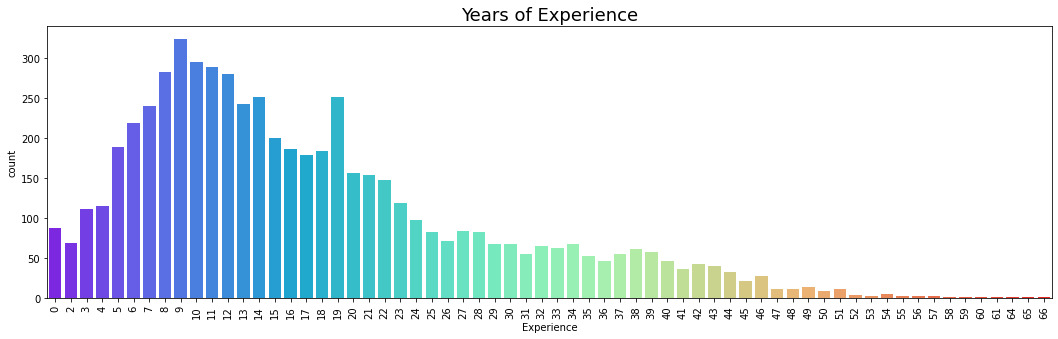



Experience :
9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [170]:
# checking the Experience count
plt.figure(figsize=[18,5])
sns.countplot(x = 'Experience', data = df_train,palette='rainbow')
plt.title('Years of Experience',fontsize =18)
plt.xlabel('Experience')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

print('\n')
print('Experience :')
print(df_train['Experience'].value_counts())


    ==> People with the experience of 9 years are more in number that is above 300.

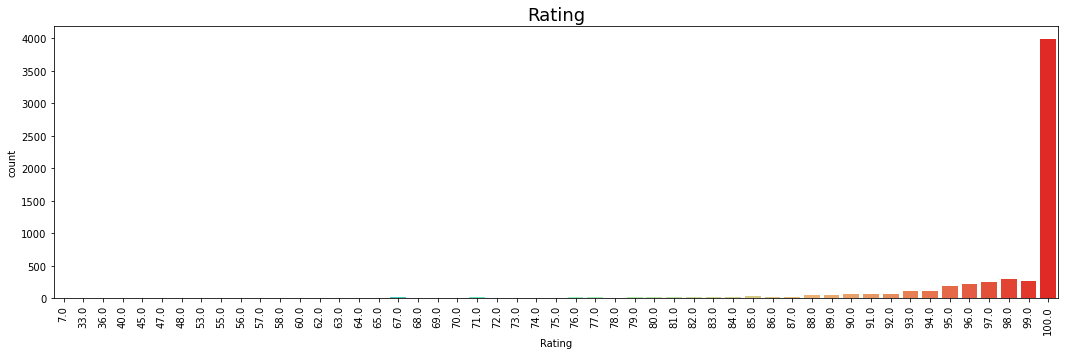



Rating :
100.0    3986
98.0      290
99.0      259
97.0      241
96.0      220
95.0      178
94.0      115
93.0      109
92.0       66
90.0       66
91.0       60
89.0       42
88.0       41
85.0       27
82.0       23
86.0       21
83.0       21
80.0       19
77.0       16
87.0       14
79.0       13
84.0       13
67.0       12
81.0       12
71.0        9
76.0        9
75.0        8
73.0        8
74.0        7
60.0        7
78.0        6
68.0        5
56.0        5
70.0        4
69.0        4
57.0        3
72.0        3
63.0        2
64.0        2
62.0        2
33.0        2
55.0        2
40.0        1
48.0        1
7.0         1
58.0        1
47.0        1
45.0        1
36.0        1
53.0        1
65.0        1
Name: Rating, dtype: int64
[100.  98.  99.  79.  95.  97.  94.  88.  90.  80.  93.  36.  78.  87.
  96.  82.  89.  74.  86.  92.  83.  76.  85.  56.  91.  68.  60.  75.
  69.  73.  67.  77.  33.  55.  71.  84.  45.  63.  72.  81.  62.  57.
   7.  48.  40.  70.  64.  65.  47.

In [171]:
# checking the Rating count
plt.figure(figsize=[18,5])
sns.countplot(x = 'Rating', data = df_train,palette='rainbow')
plt.title('Rating',fontsize =18)
plt.xlabel('Rating')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

print('\n')
print('Rating :')
print(df_train['Rating'].value_counts())
print(df_train['Rating'].unique())

==> Most of the patients have given rating as 100 percent.

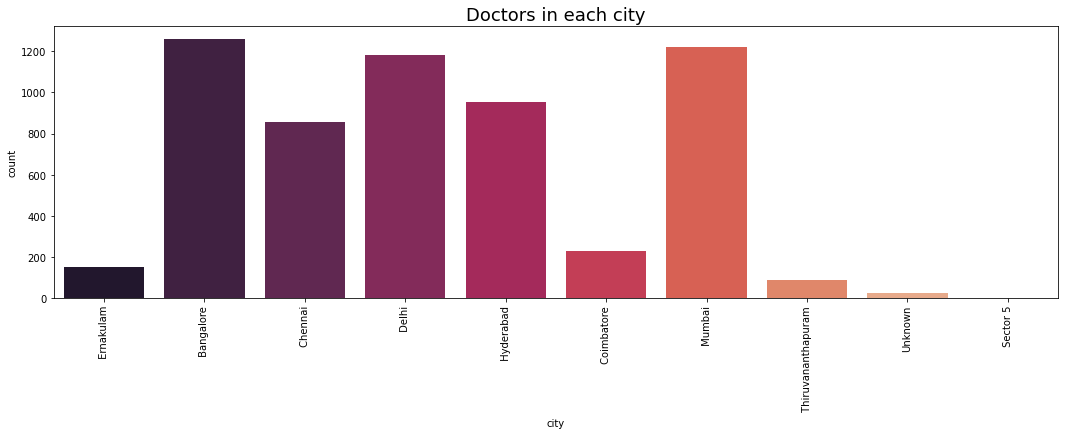



city :
 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  26
 Sector 5                 1
Name: city, dtype: int64
[' Ernakulam' ' Bangalore' ' Chennai' ' Delhi' ' Hyderabad' ' Coimbatore'
 ' Mumbai' ' Thiruvananthapuram' 'Unknown' ' Sector 5']


In [172]:
# checking the Place count
plt.figure(figsize=[18,5])
sns.countplot(x = 'city', data = df_train,palette='rocket')
plt.title('Doctors in each city',fontsize =18)
plt.xlabel('city')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

print('\n')
print('city :')
print(df_train['city'].value_counts())
print(df_train['city'].unique())

==> Bangalore has more doctors and Thiruvananthapuram has least doctors.

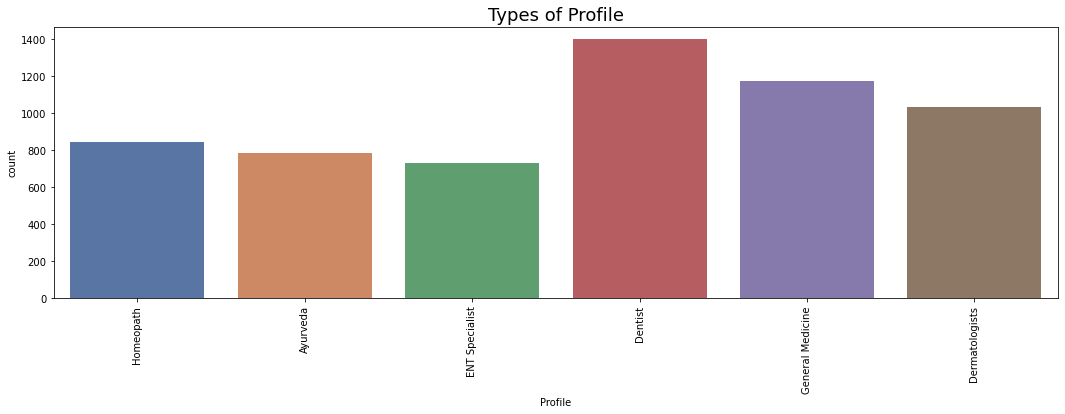



Profile :
Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64
['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']


In [173]:
# checking the Profile count
plt.figure(figsize=[18,5])
sns.countplot(x = 'Profile', data = df_train,palette='deep')
plt.title('Types of Profile',fontsize =18)
plt.xlabel('Profile')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

print('\n')
print('Profile :')
print(df_train['Profile'].value_counts())
print(df_train['Profile'].unique())

==> Most of the doctors are dentists and least are ENT Specialists.

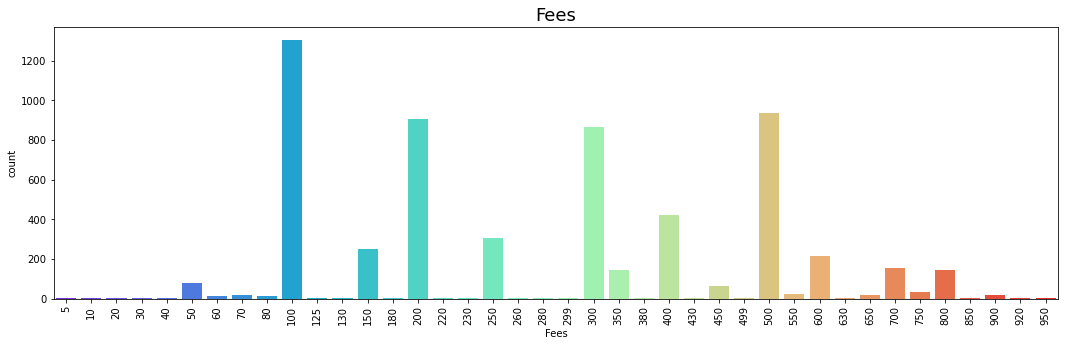



Fees :
100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64
[100 350 300 250 200 700 500 400 150 650 600  50 800 750 450  80  60 550
 900 950 430 130 630 499 260  70  10 299 230 380   5 280  40  30 180 920
 125 850  20 220]


In [174]:
# checking the Fees count
plt.figure(figsize=[18,5])
sns.countplot(x = 'Fees', data = df_train,palette='rainbow')
plt.title('Fees',fontsize =18)
plt.xlabel('Fees')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

print('\n')
print('Fees :')
print(df_train['Fees'].value_counts())
print(df_train['Fees'].unique())

    ==> Doctors taking consultation fees as 100 are more
    
    ==> Only one Doctor is taking 5 as consultation fees which is the least.

# Bi-variate Analysis

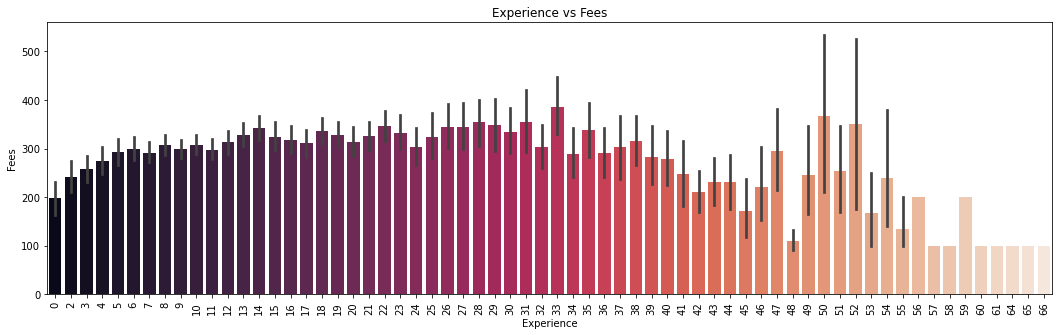

Experience  Fees
0           100     47
            200     13
            500      6
            400      5
            150      3
                    ..
60          100      1
61          100      1
64          100      1
65          100      1
66          100      1
Name: Fees, Length: 712, dtype: int64
Experience
0     12
2      9
3     13
4     14
5     13
      ..
60     1
61     1
64     1
65     1
66     1
Name: Fees, Length: 64, dtype: int64


In [175]:
plt.figure(figsize=[18,5])
sns.barplot(x=df_train['Experience'],y=df_train['Fees'],palette='rocket',data=df_train)
plt.title('Experience vs Fees')
plt.xlabel('Experience')
plt.ylabel('Fees')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('Experience')['Fees'].value_counts())
print(df_train.groupby('Experience')['Fees'].nunique())

==> Doctors having an experience of 33 years take more consultation fees that is 400

==> Doctors having an experience over 57 years take consultation fees as 100 except 59 years.

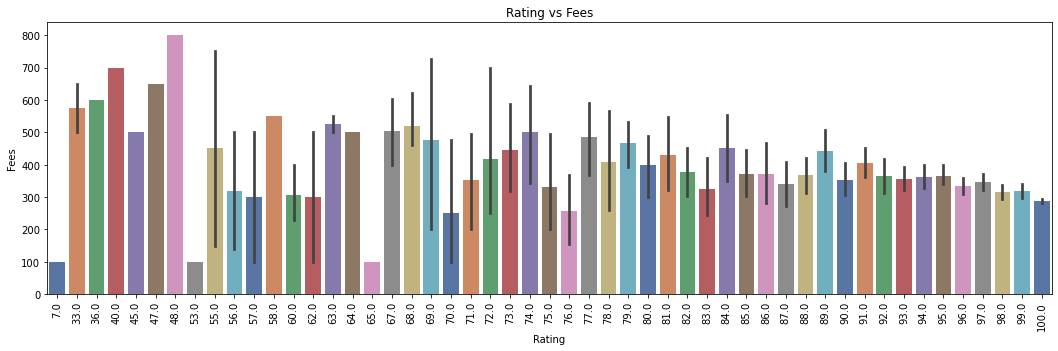

Rating  Fees
7.0     100     1
33.0    500     1
        650     1
36.0    600     1
40.0    700     1
               ..
100.0   430     1
        499     1
        630     1
        850     1
        950     1
Name: Fees, Length: 371, dtype: int64


In [176]:
plt.figure(figsize=[18,5])
sns.barplot(x=df_train['Rating'],y=df_train['Fees'],palette='deep',data=df_train)
plt.title('Rating vs Fees')
plt.xlabel('Rating')
plt.ylabel('Fees')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('Rating')['Fees'].value_counts())

==> The doctors with 48% rating takes more consultation fee that is 800.

==> The doctors having rating as 7% ,53% and 65% takes consultation fee as 100 and are least.

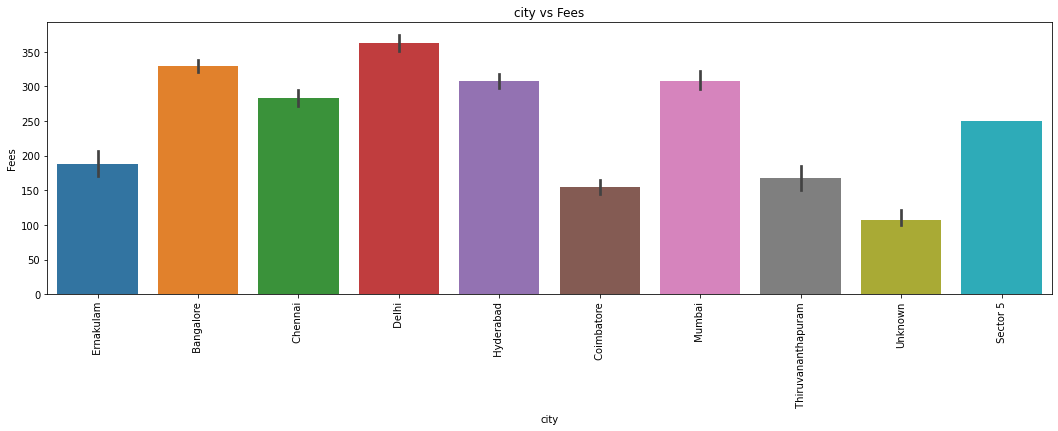

city                 Fees
 Bangalore           300     229
                     500     204
                     200     185
                     100     147
                     400     147
                            ... 
 Thiruvananthapuram  80        1
                     250       1
Unknown              100      24
                     150       1
                     250       1
Name: Fees, Length: 151, dtype: int64


In [177]:
plt.figure(figsize=[18,5])
sns.barplot(x=df_train['city'],y=df_train['Fees'],data=df_train)
plt.title('city vs Fees')
plt.xlabel('city')
plt.ylabel('Fees')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('city')['Fees'].value_counts())

==> Most of the doctors charging consultation fee more are from Delhi and doctors from Coimbatore consultation charges the least fees.

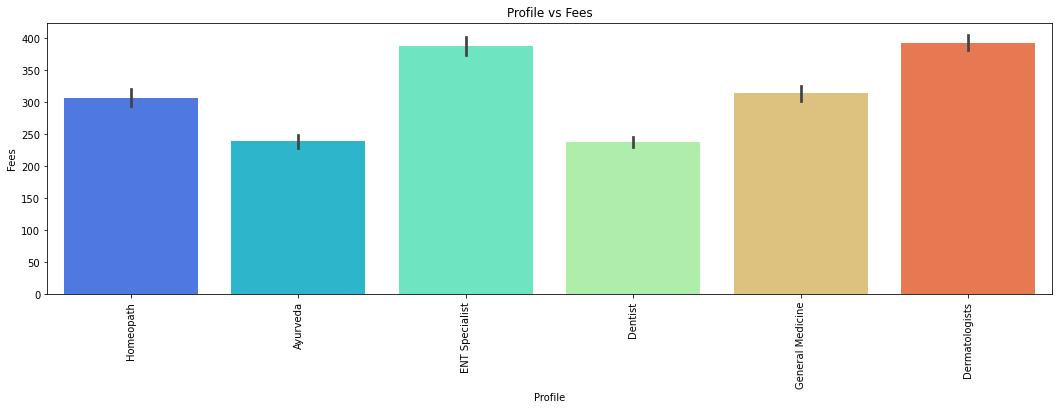

Profile    Fees
Ayurveda   100     203
           200     126
           300     120
           500     111
           150      57
                  ... 
Homeopath  40        1
           130       1
           499       1
           550       1
           920       1
Name: Fees, Length: 133, dtype: int64


In [178]:
plt.figure(figsize=[18,5])
sns.barplot(x=df_train['Profile'],y=df_train['Fees'],palette='rainbow',data=df_train)
plt.title('Profile vs Fees')
plt.xlabel('Profile')
plt.ylabel('Fees')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('Profile')['Fees'].value_counts())

==> Dermatologists and ENT Specialist charges more consultation fees.

==> Dentists charges the least consultation fees.

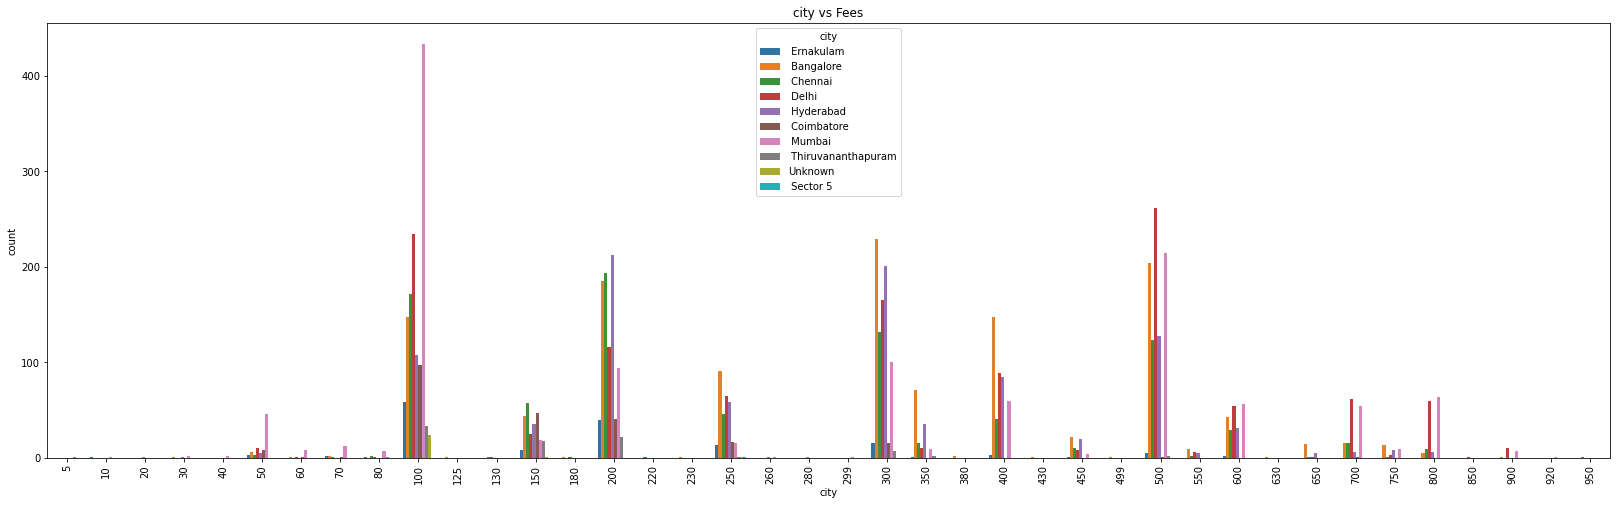

city                 Fees
 Bangalore           300     229
                     500     204
                     200     185
                     100     147
                     400     147
                            ... 
 Thiruvananthapuram  80        1
                     250       1
Unknown              100      24
                     150       1
                     250       1
Name: Fees, Length: 151, dtype: int64


In [179]:
plt.figure(figsize=[28,8])
sns.countplot(x='Fees',hue='city',data=df_train)
plt.title('city vs Fees')
plt.xlabel('city')
plt.xticks(rotation = 90)
plt.show()

print(df_train.groupby('city')['Fees'].value_counts())

 ==> Mumbai doctors charging consultation fee as 100 are more in number than any other city.

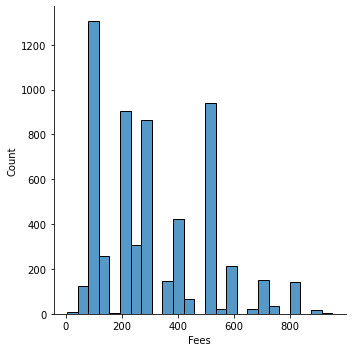

In [180]:
sns.displot(df_train['Fees'])

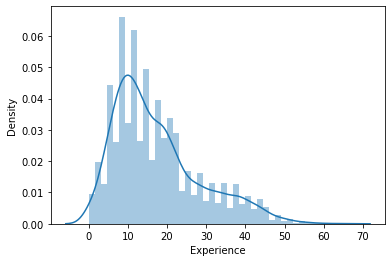

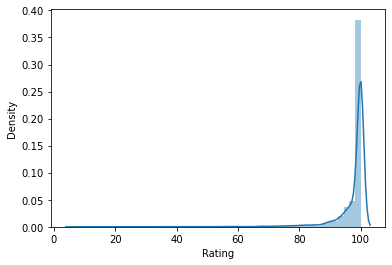

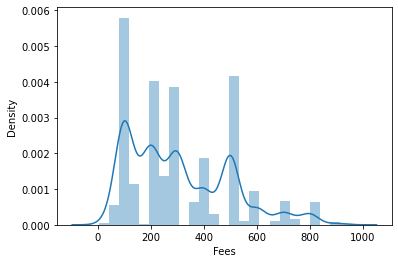

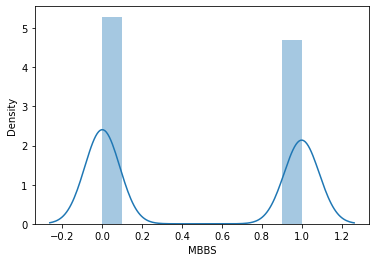

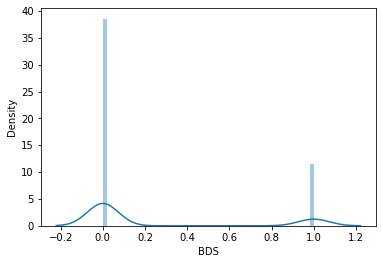

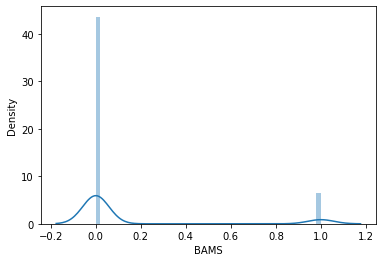

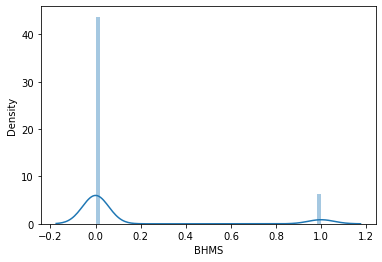

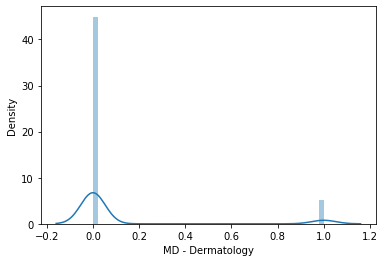

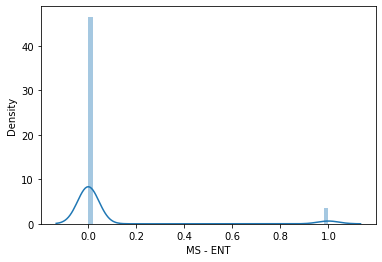

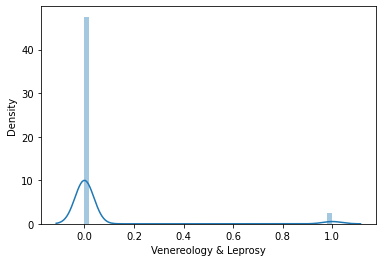

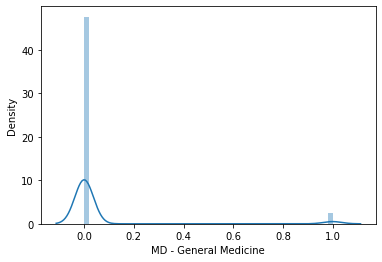

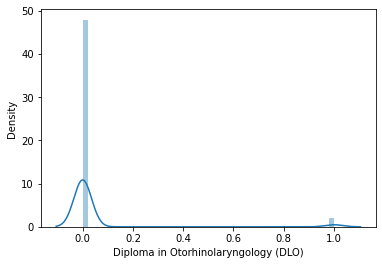

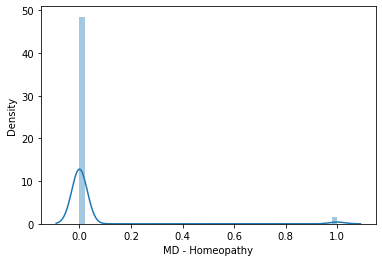

In [181]:
d=df_train.columns
for i in d:
    if df_train[i].dtypes!='object':
        sns.distplot(df_train[i])
        plt.show()

Experience and Rating have lots of skewed data

# Converting Categorical columns into Numerical columns

# Label encoding

In [182]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['city','locality','Profile']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])

In [183]:
df_train.head(5)

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.0,5,100,296,4,0,0,0,1,0,0,0,0,0,1
1,12,98.0,0,350,856,0,0,0,1,0,0,0,0,0,0,0
2,9,100.0,3,300,452,0,1,0,0,0,0,0,0,0,0,0
3,12,100.0,0,250,68,0,0,0,1,0,0,0,0,0,0,0
4,20,100.0,0,250,335,1,0,0,1,0,0,0,0,0,0,0


In [184]:
df_train.shape

(5961, 16)

we have 5961 rows and 16 columns

# Test data

In [185]:
#Loading the test data
df_test = pd.read_excel('C:/Users/vishu/OneDrive/Desktop/Final_Test.xlsx')
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


# Using the same data preprocessing steps on test data and running all of them in a single cell.

In [186]:
print('Checking the shape of test dataset :')
print('====================================')
print(df_test.shape)
print('\n')

print('Checking the columns of test dataset:')
print('=====================================')
print(df_test.columns)
print('\n')

print('Checking the information of the dataset')
print('=======================================')
print(df_test.info())
print('\n')

print('Checking the null values:')
print('=========================')
print(df_test.isnull().sum())
print('\n')

for col in ['Rating','Place','Miscellaneous_Info']:
    df_test[col].fillna(df_test[col].mode()[0],inplace = True)
print('\n')

print('Checking the null values:')
print('=========================')
print(df_test.isnull().sum())
print('\n')

df_test['Rating'] = df_test['Rating'].str[0:-1].astype(float)
df_test['Experience'] = df_test['Experience'].str.slice(stop=2).astype(int)
df_test['City'] = df_test['Place'].str.split(', ').str[-1]
df_test['Area'] = df_test['Place'].str.split(', ').str[0]
df_test.drop(['Place'],axis = 1,inplace = True)
df_test

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Qualification','City','Area','Profile','Miscellaneous_Info','City','Area']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_test[column] = label_encoders[column].fit_transform(df_test[column])
    
test = df_test
test.head()

Checking the shape of test dataset :
(1987, 6)


Checking the columns of test dataset:
Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')


Checking the information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB
None


Checking the null values:
Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64




Checking

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City,Area
0,241,35,100.0,4,598,6,142
1,340,31,100.0,3,598,5,577
2,258,40,70.0,2,153,1,212
3,6,0,100.0,0,598,3,373
4,79,16,100.0,1,816,0,231


In [187]:
#Checking the shape of the test dataset
test.shape

(1987, 7)

There are 1987 rows and 7 columns in the test dataset.

# Summary Statistics

In [188]:
df_train.describe()

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,97.610636,2.441872,307.944640,412.590169,3.098977,0.470559,0.228485,0.127831,0.125482,0.101493,0.068948,0.049153,0.047811,0.041772,0.030364
std,11.142798,5.881539,1.658014,190.920373,256.239149,2.350982,0.499174,0.419892,0.333929,0.331293,0.302006,0.253387,0.216205,0.213384,0.200083,0.171601
min,0.000000,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,98.000000,1.000000,150.000000,195.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,100.000000,2.000000,300.000000,409.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,100.000000,4.000000,500.000000,626.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,100.000000,5.000000,950.000000,866.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# To check Correlation

In [189]:
df_train.corr()

,Experience,Rating,Profile,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
Experience,1.000000,-0.149594,0.202073,0.002117,0.002229,0.013826,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,0.097549,0.111103,0.008510
Rating,-0.149594,1.000000,-0.047013,-0.154713,0.035090,0.071856,-0.216415,0.086577,0.100012,0.097841,-0.105269,-0.150522,-0.018593,-0.067117,-0.070868,0.022355
Profile,0.202073,-0.047013,1.000000,0.145226,0.016979,-0.017894,0.355290,-0.473295,-0.559943,0.583268,-0.087903,0.093610,-0.059195,0.203958,0.076358,0.273052
Fees,0.002117,-0.154713,0.145226,1.000000,-0.062557,-0.041873,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,0.040921,0.011560,0.018601
locality,0.002229,0.035090,0.016979,-0.062557,1.000000,-0.068463,0.015329,0.017589,-0.031266,-0.003369,-0.020938,-0.001847,-0.010984,0.044805,-0.003397,-0.025813
city,0.013826,0.071856,-0.017894,-0.041873,-0.068463,1.000000,-0.067001,-0.011525,0.044578,0.015072,-0.015569,-0.028075,-0.003631,-0.003080,-0.085480,0.032475
MBBS,0.271347,-0.216415,0.355290,0.271038,0.015329,-0.067001,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,0.220358,0.206347,-0.164871
BDS,-0.196268,0.086577,-0.473295,-0.198635,0.017589,-0.011525,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,-0.121943,-0.113622,-0.096301
BAMS,-0.047150,0.100012,-0.559943,-0.139891,-0.031266,0.044578,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,-0.078722,-0.079932,-0.067747
BHMS,-0.114191,0.097841,0.583268,-0.002423,-0.003369,0.015072,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,-0.077760,-0.079088,0.349109


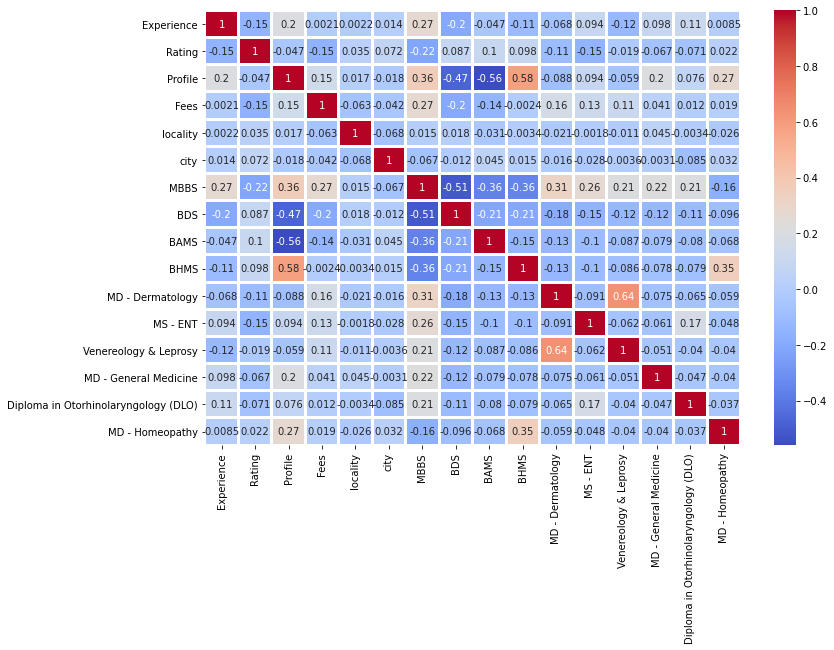

In [190]:
#visualizing correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot = True,cmap='coolwarm',linewidths=2);

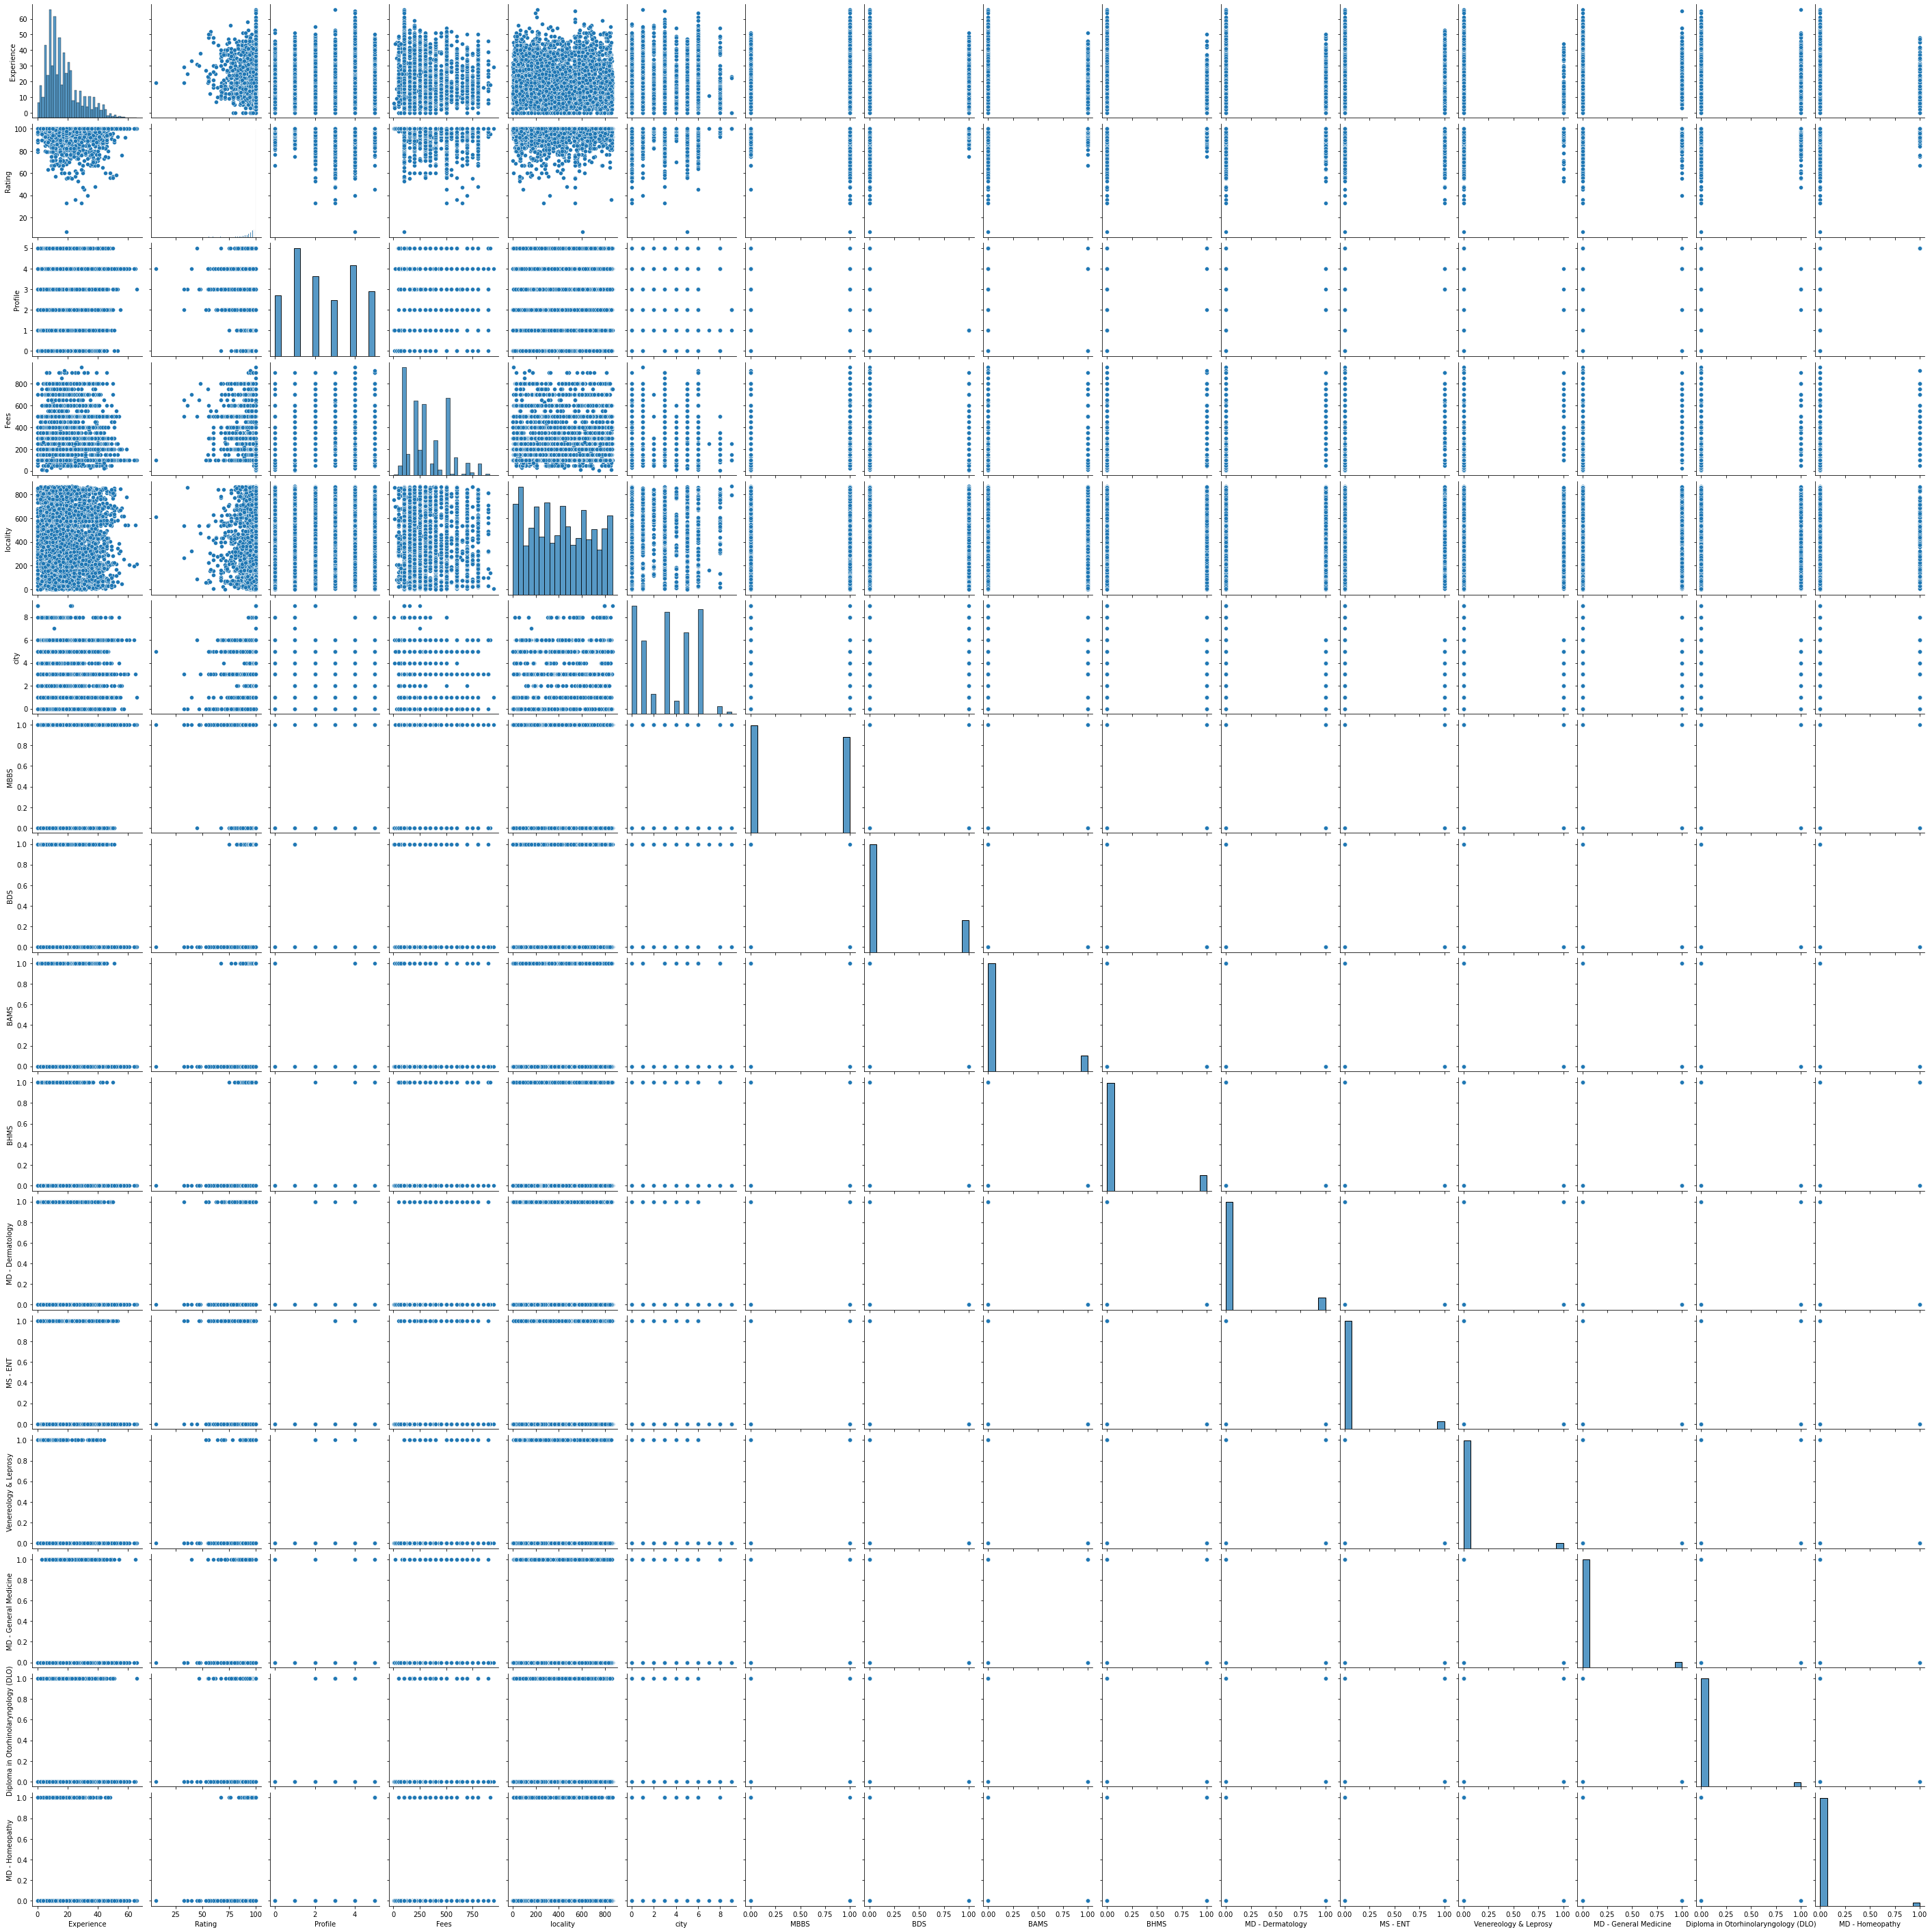

In [191]:
sns.pairplot(df_train)

In [192]:
df_train.skew()

Experience                              0.991089
Rating                                 -4.701646
Profile                                 0.108803
Fees                                    0.751870
locality                                0.109243
city                                    0.081154
MBBS                                    0.118000
BDS                                     1.293695
BAMS                                    2.229777
BHMS                                    2.261706
MD - Dermatology                        2.639954
MS - ENT                                3.403459
Venereology & Leprosy                   4.171950
MD - General Medicine                   4.239699
Diploma in Otorhinolaryngology (DLO)    4.581912
MD - Homeopathy                         5.475409
dtype: float64

In [193]:
#Treating skewness via log method
import numpy as np
for col in df_train.columns:
    if df_train[col].skew()> 1:
        df_train[col] = np.log1p(df_train[col])

In [194]:
df_train.skew()

Experience                              0.991089
Rating                                 -4.701646
Profile                                 0.108803
Fees                                    0.751870
locality                                0.109243
city                                    0.081154
MBBS                                    0.118000
BDS                                     1.293695
BAMS                                    2.229777
BHMS                                    2.261706
MD - Dermatology                        2.639954
MS - ENT                                3.403459
Venereology & Leprosy                   4.171950
MD - General Medicine                   4.239699
Diploma in Otorhinolaryngology (DLO)    4.581912
MD - Homeopathy                         5.475409
dtype: float64

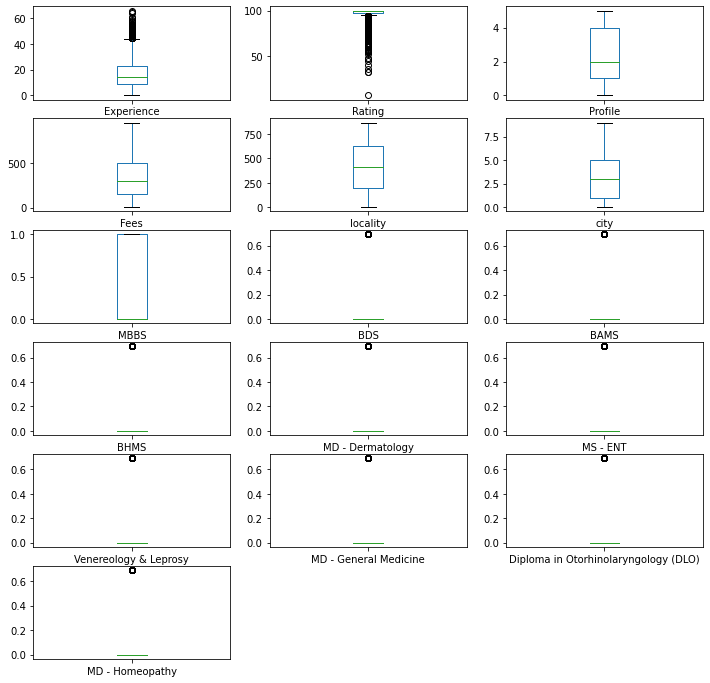

In [195]:
df_train.plot(kind='box', subplots=True, layout=(6,3), figsize=(12,12))
plt.show()

In [196]:
from scipy.stats import zscore
z = np.abs(zscore(df_train))
z

array([[0.60097885, 0.40628223, 1.54301587, ..., 0.22407904, 0.20878802,
        5.65099121],
       [0.47604029, 0.06620663, 1.47289258, ..., 0.22407904, 0.20878802,
        0.17696011],
       [0.74529508, 0.40628223, 0.33665249, ..., 0.22407904, 0.20878802,
        0.17696011],
       ...,
       [2.12675597, 0.10383117, 0.93983418, ..., 0.22407904, 0.20878802,
        0.17696011],
       [0.20678551, 1.29409575, 0.93983418, ..., 4.462711  , 0.20878802,
        0.17696011],
       [0.02728232, 0.40628223, 0.86971089, ..., 0.22407904, 0.20878802,
        0.17696011]])

In [197]:
threshold = 3
print(np.where(z>3))

(array([   0,    8,   14, ..., 5955, 5956, 5959], dtype=int64), array([15, 13, 14, ..., 15, 11, 13], dtype=int64))


In [198]:
df_new=df_train[(z<3).all(axis=1)]

In [199]:
print(df_train.shape,'\t',df_new.shape)

(5961, 16) 	 (4503, 16)


In [200]:
df_train = df_new
print(df_train.shape)

(4503, 16)


In [201]:
#Seperating into input and output variables
x = df_train.drop(['Fees'], axis=1)
y = df_train['Fees']

In [202]:
print(x.shape,'\t',y.shape)

(4503, 15) 	 (4503,)


In [203]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [204]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [205]:
print(x_train.shape,'\t',x_test.shape)

print(y_train.shape,'\t',y_test.shape)

(3602, 15) 	 (901, 15)
(3602,) 	 (901,)


In [206]:
#Importing Models library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [207]:
#Using algorithms via loop
model = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    
    print('Error:')
    
    print('Mean absolute error:', mean_absolute_error(y_test,predm))
    print('Mean squared error:', mean_squared_error(y_test, predm))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predm)))
    print('r2_score:',r2_score(y_test, predm))
    print('==============================================================================================')
    print('\n')

score of LinearRegression() is: 0.11410530166796262
Error:
Mean absolute error: 134.6517523377095
Mean squared error: 28484.360539746107
Root Mean Squared Error: 168.7731037213753
r2_score: 0.11102736681687564


score of DecisionTreeRegressor() is: 0.9920665455060327
Error:
Mean absolute error: 160.77691453940068
Mean squared error: 50574.028856825746
Root Mean Squared Error: 224.88670226766575
r2_score: -0.5783723682614377


score of KNeighborsRegressor() is: 0.3726301634243607
Error:
Mean absolute error: 136.41220865704773
Mean squared error: 31751.704905660376
Root Mean Squared Error: 178.1900808284804
r2_score: 0.009056331854377486


score of SVR() is: 0.04706323767914311
Error:
Mean absolute error: 132.81868741739274
Mean squared error: 30208.609633918735
Root Mean Squared Error: 173.8062416425795
r2_score: 0.057215021078187656


score of Lasso() is: 0.11247181202307033
Error:
Mean absolute error: 135.2150802749048
Mean squared error: 28490.28165279286
Root Mean Squared Error: 168

In [208]:
# AdaBoostRegressor

In [209]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("mse==",mean_squared_error(y_test,predad))
print("R2SCORE" ,r2_score(y_test,predad))

mse== 28846.372961940287
R2SCORE 0.09972926743514976


In [210]:
#cross validate the models
from sklearn.model_selection import GridSearchCV,cross_val_score
models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in models:
    score = cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Model',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('==========================================================')
    print('\n')

Model LinearRegression()
Score: [0.12159764 0.11223991 0.07645269 0.12663775]
Mean Score: 0.1092319943302262
Standard deviation: 0.019617593186692903


Model DecisionTreeRegressor()
Score: [-0.55282034 -0.5310972  -0.6399022  -0.51843405]
Mean Score: -0.5605634479500924
Standard deviation: 0.04742820735586938


Model KNeighborsRegressor()
Score: [ 0.06871437 -0.01348064  0.02077329  0.06284909]
Mean Score: 0.03471402713987368
Standard deviation: 0.03340911279146174


Model SVR()
Score: [0.05785961 0.03092982 0.04377928 0.04644077]
Mean Score: 0.044752367300904344
Standard deviation: 0.009574187316355984


Model Lasso()
Score: [0.12051067 0.11040955 0.07732869 0.12259863]
Mean Score: 0.1077118824629835
Standard deviation: 0.01813725567941872


Model Ridge()
Score: [0.12161167 0.11224129 0.07647146 0.12661911]
Mean Score: 0.10923588153274422
Standard deviation: 0.01960788314009747


Model ElasticNet()
Score: [0.10877655 0.09824194 0.07762805 0.11105917]
Mean Score: 0.09892642415801539
St

# Hyperparameter tuning 

# Random forest

In [211]:
#using GridsearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

parameters = {
            "n_estimators" : [10,50,100],
            "max_features" : ['auto', 'log2', 'sqrt'],
            "bootstrap"    : [True, False],
            "max_depth"    : [20,30,40,50]
        }

RFR=RandomForestRegressor()

clf = GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 100}


In [212]:
#Using RandomForestRegressor model with best results
rf=RandomForestRegressor(n_estimators=100,bootstrap= True,max_features='log2',max_depth=20)
rf.fit(x_train,y_train)

print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test, y_pred))

Score: 0.8566814112828987


Mean absolute error: 126.30819866516963
Mean squared error: 27336.605377708383
Root Mean Squared Error: 165.33785222298124
r2_score: 0.14684782791595752


# Best Model : GradientBoostingRegressor

In [213]:
GBR=GradientBoostingRegressor(random_state=97)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
GBR.fit(x_train,y_train)
prd=GBR.predict(x_test)
accuracy=r2_score(y_test,prd)
print(accuracy)
print("Mean_Squared_Error is: ",mean_squared_error(y_test,prd))
print("Mean_Absolute_Error is: ",mean_absolute_error(y_test,prd))

0.22339218920282677
Mean_Squared_Error is:  24883.979613096533
Mean_Absolute_Error is:  121.87194556545984


In [214]:
Finalmode5=GradientBoostingRegressor()
Finalmode5.fit(x_train, y_train)

pred=Finalmode5.predict(x_test)
R2=r2_score(y_test,pred)

print(R2*100)

22.33518935584916


# Conclusion

Our accuracy is 22.33 % using GradientBoostingRegressor and we select this model is our best model

# Saving the model

In [215]:
#importing joblib
import joblib

#saving the model in a pickle file
joblib.dump(Finalmode5,'Doctorfee.pkl')

['Doctorfee.pkl']

# Testing the model

Removing Outliers from Test data and passing it to the model.

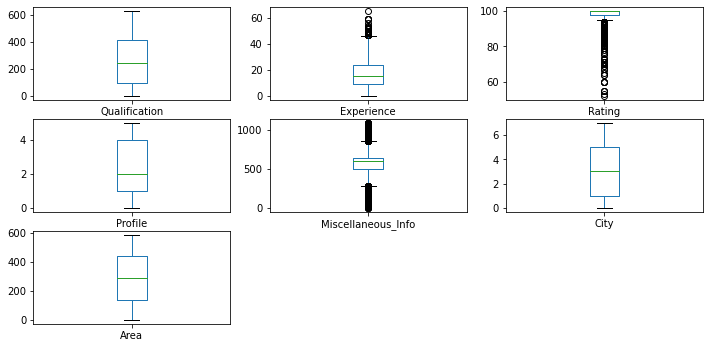

In [216]:
test.plot(kind='box', subplots=True, layout=(6,3), figsize=(12,12))
plt.show()

In [217]:
from scipy.stats import zscore
z = np.abs(zscore(test))
z

array([[0.1020893 , 1.50699229, 0.43326278, ..., 0.10353434, 1.30991115,
        0.84334559],
       [0.43041389, 1.15500055, 0.43326278, ..., 0.10353434, 0.86861012,
        1.66563462],
       [0.01064936, 1.94698195, 4.74659969, ..., 1.76312592, 0.89659398,
        0.43960165],
       ...,
       [1.1511758 , 0.78095398, 0.43326278, ..., 0.10353434, 0.89659398,
        0.77739794],
       [1.12406513, 0.51696018, 0.08793861, ..., 1.68495214, 1.33789501,
        1.51240698],
       [0.66708198, 0.86895191, 0.43326278, ..., 2.36716879, 0.89659398,
        0.60436483]])

In [218]:
threshold = 3
print(np.where(z>3))

(array([   2,   17,   65,   72,  104,  139,  168,  195,  214,  258,  264,
        362,  398,  412,  436,  449,  454,  564,  617,  622,  641,  652,
        671,  676,  772,  773,  964,  976,  992,  992,  996, 1001, 1061,
       1094, 1099, 1121, 1201, 1233, 1246, 1284, 1288, 1294, 1297, 1337,
       1394, 1405, 1425, 1451, 1501, 1530, 1566, 1640, 1657, 1724, 1776,
       1790, 1825, 1830, 1856, 1875, 1958], dtype=int64), array([2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [219]:
final_test=test[(z<3).all(axis=1)]

In [220]:
print(test.shape,'\t',final_test.shape)

(1987, 7) 	 (1927, 7)


# Observations :

Now,1987 rows reduced to 1927 rows.Therefore,outliers are removed.

To test the data,we pass final preprocessed test data into the model.

In [221]:
gbr_reloaded = joblib.load('Doctorfee.pkl')

In [222]:
gbr_reloaded = joblib.load('Doctorfee.pkl')

# Conclusion

==> GradientBoostRegressor gave the best score and r2_score.So,we choose GradientBoostRegressor as the best model.
   
==> Test data is passed into the model and made predictions.   